In [1]:
import os
import os.path as osp
import sys
sys.path.insert(0, osp.dirname(osp.abspath(".")))

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

In [3]:
# HYPERPARAMETER
RESULT_DIR = "../run/depthsort/5p_sa_pm_up.msv/"

In [4]:
# PREDS SAVE MOT2D RESULT AS DICT, WITH KEY INDICATING FRAME ID, VALUE INDICATE TRACKED OBJECT (TID, BBOX)
preds = {}
with open(osp.join(RESULT_DIR, 'pred.txt'), 'r') as f:
    lines = [ line for line in f.read().split('\n') if len(line) > 0 ]
    for line in lines:
        fields = [ f for f in line.split(",") if len(f) > 0 ]
        fid = int(fields[0])
        tid = fields[1]
        bbox = np.array([ float(v) for v in fields[2:2+4] ])
        bbox[2] = bbox[0] + bbox[2]
        bbox[3] = bbox[1] + bbox[3]
        if fid not in preds:
            preds[fid] = []
        preds[fid].append((tid, bbox))

In [5]:
# SNAPSHOTS IS A LIST OF SNAPSHOT, A SNAPSHOT RECORDS FEATURE REPRESENTATION ON EACH TRACK
with open(osp.join(RESULT_DIR, 'snapshots.pkl'), 'rb') as f:
    snapshots = pickle.load(f)

## Aggregate first track features

In [6]:
# WHICH TRACKS I WANT TO AGGREGATE ALL THE FEATURES
TARGET_TRACKS = [6]

In [7]:
# AGGREGATE TARGET FEATURES TOGETHER
first_features = []
for snapshot in snapshots:
    for tid, features in snapshot.items():
        if tid in TARGET_TRACKS:
            if len(first_features) == 0:
                first_features = np.array(features)
            else:
                first_features = np.concatenate([first_features, np.array(features)])

## Aggregate second track features

In [8]:
# WHICH TRACKS I WANT TO AGGREGATE ALL THE FEATURES
TARGET_TRACKS = [13]

In [9]:
# AGGREGATE TARGET FEATURES TOGETHER
second_features = []
for snapshot in snapshots:
    for tid, features in snapshot.items():
        if tid in TARGET_TRACKS:
            if len(second_features) == 0:
                second_features = np.array(features)
            else:
                second_features = np.concatenate([second_features, np.array(features)])

## Aggregate third track features

In [10]:
# WHICH TRACKS I WANT TO AGGREGATE ALL THE FEATURES
TARGET_TRACKS = [7]

In [11]:
# AGGREGATE TARGET FEATURES TOGETHER
third_features = []
for snapshot in snapshots:
    for tid, features in snapshot.items():
        if tid in TARGET_TRACKS:
            if len(third_features) == 0:
                third_features = np.array(features)
            else:
                third_features = np.concatenate([third_features, np.array(features)])

## Visualization

In [12]:
all_features = np.concatenate([first_features, second_features, third_features])

In [13]:
# SUBSAMPLING FEATURES TO RENDER
sub_samples = 9000
n_samples = all_features.shape[0]
indices = np.random.choice(np.arange(n_samples), sub_samples, replace=False)
features = all_features[indices]

In [14]:
# Visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)

# tsne = TSNE(n_components=2, n_iter=3000)
# reduced = tsne.fit_transform(reduced)

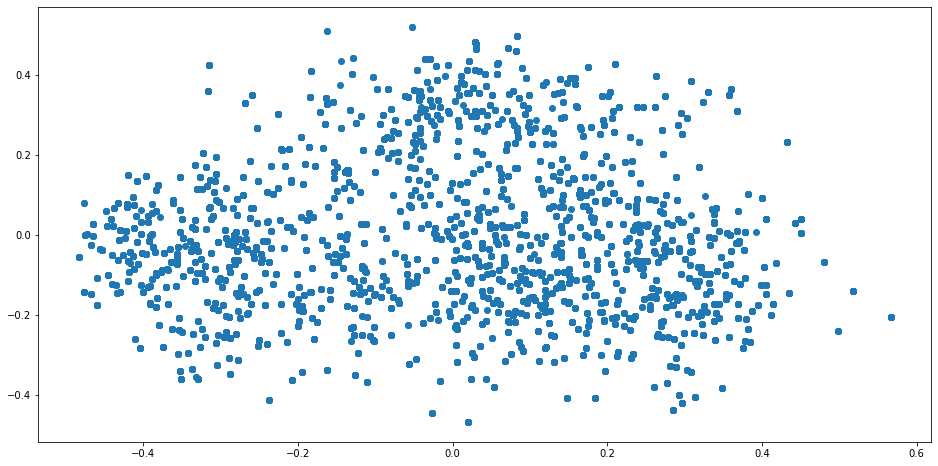

In [15]:
plt.figure(figsize=(16, 8))
plt.scatter(reduced[:, 0], reduced[:, 1])

In [16]:
fl = len(first_features)
sl = len(second_features)
tl = len(third_features)

ranges = [(0, fl), (fl, fl+sl), (fl+sl, fl+sl+tl)]
labels = []
for idx in indices:
    for gid, rang in enumerate(ranges):
        if rang[0] <= idx < rang[1]:
            labels.append(gid)

In [17]:
group1 = np.where(np.array(labels) == 0)[0]
group2 = np.where(np.array(labels) == 1)[0]
group3 = np.where(np.array(labels) == 2)[0]

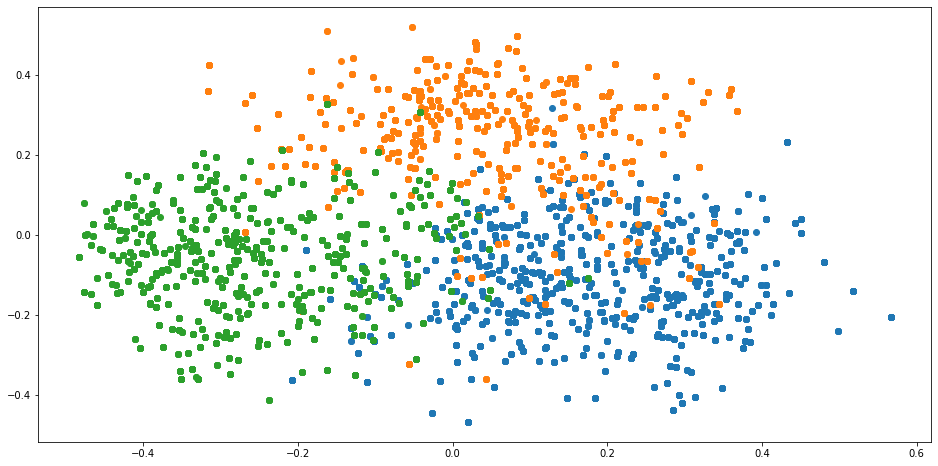

In [18]:
reduced1 = reduced[group1]
reduced2 = reduced[group2]
reduced3 = reduced[group3]

plt.figure(figsize=(16, 8))
plt.scatter(reduced1[:, 0], reduced1[:, 1])
plt.scatter(reduced2[:, 0], reduced2[:, 1])
plt.scatter(reduced3[:, 0], reduced3[:, 1])

## Conclusion

From the feature distribution shown above, the feature representatino of a track